In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

### 데이터 읽어오기

In [2]:
chipo = pd.read_csv("data/chipotle.tsv", sep="\t")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
# 결측치 확인
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
# 컬럼명 확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 요약 통계 정보

In [7]:
# 숫자 데이터에 대한 요약 통계 정보
# 숫자 데이터 중에 범위형 데이터으 컬럼만 확인한다.
# chipo.describe()
# count : 결측치를 제외한 개수
# mean : 결측치를 제외한 평균
# std : 결측치를 제외한 표준편차
# min : 결측치를 제외한 최소값
# 25% : 결측치를 제외한 25%의 위치 값
# 50% : 결측치를 제외한 50%의 위치 값
# 
chipo[["order_id", "quantity"]].describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [8]:
# 문자열 칼럼 요약통계 정보
# 숫자 칼럼이라도 하더라고 카테고리형 데이터라고 한다면 문자로 변환한다음
# 문자열 컬럼 요약통계 정보로 확인한다.

chipo[["item_name", "choice_description", "item_price"]].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


### 카테고리형 데이터의 데이터 종류

In [9]:
chipo["item_name"].value_counts().index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Chips', 'Steak Bowl',
       'Bottled Water', 'Chicken Soft Tacos', 'Chicken Salad Bowl',
       'Chips and Fresh Tomato Salsa', 'Canned Soda', 'Side of Chips',
       'Veggie Burrito', 'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl',
       'Barbacoa Bowl', 'Carnitas Burrito', 'Steak Soft Tacos',
       '6 Pack Soft Drink', 'Chips and Tomatillo Red Chili Salsa',
       'Chicken Crispy Tacos', 'Chips and Tomatillo Green Chili Salsa',
       'Carnitas Soft Tacos', 'Steak Crispy Tacos',
       'Chips and Tomatillo-Green Chili Salsa', 'Steak Salad Bowl',
       'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Chips and Tomatillo-Red Chili Salsa', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa', 'Barbacoa Crispy Tacos',
       'Barbacoa Salad Bowl', 'Chicken Salad', 'Carnitas Crispy Tacos',
       'Veggie S

In [10]:
len(chipo["item_name"].unique())

50

이 식당의 메뉴는 총 50가지가 된다.

### 가장 많이 주문한 item 파악하기

In [11]:
# 상품 이름별 몇 개 씩 저장되어 있는지 값을 가져온다.
a1 = chipo["item_name"].value_counts()
# 처음 것을 가져온다.
print(f"가장 많이 주문한 음식 : {a1.index[0]}")

가장 많이 주문한 음식 : Chicken Bowl


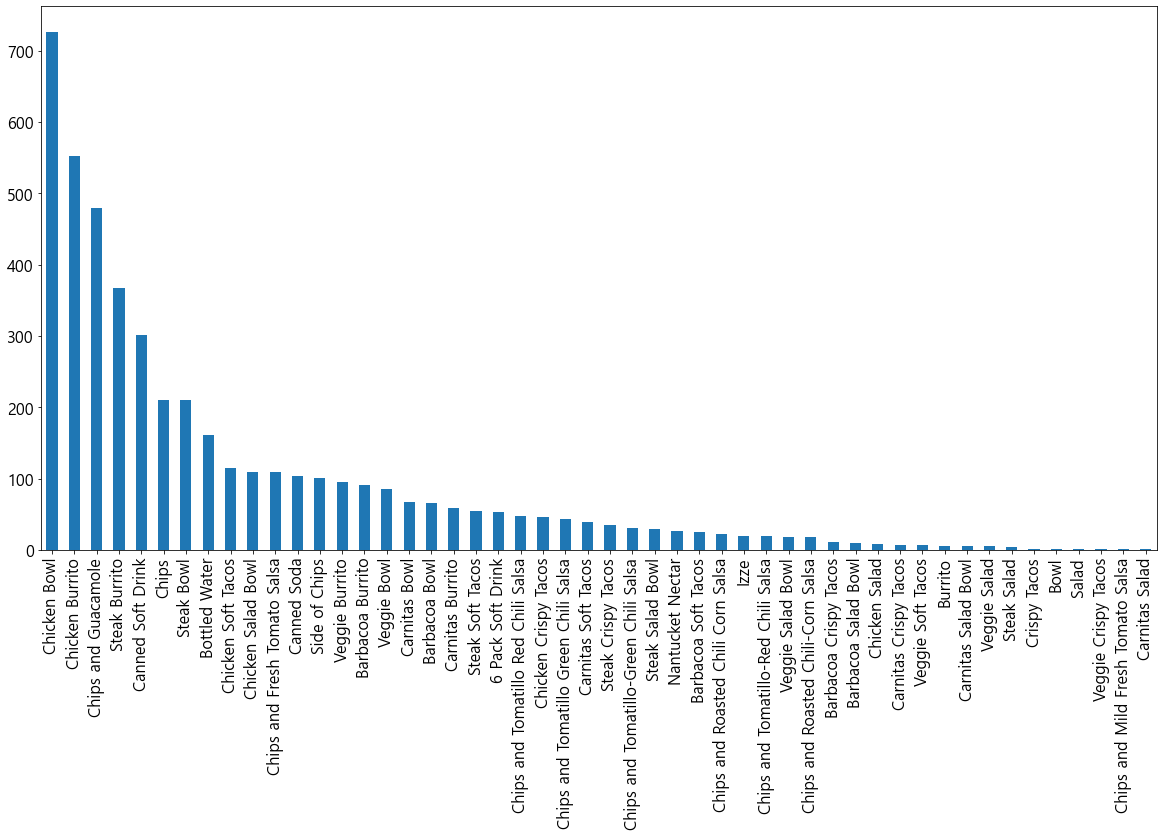

In [12]:
a1 = chipo["item_name"].value_counts()
a1.plot.bar()
plt.show()

### item_name 당 주문 개수 와 총량을 구한다.

In [13]:
# item 당 주문 개수를 가져온다.
order_count = chipo.groupby("item_name")["order_id"].count()
order_count.sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [14]:
# 아이템당 주문 총량을 구한다.
item_quantity = chipo.groupby("item_name")["quantity"].sum()
item_quantity.sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


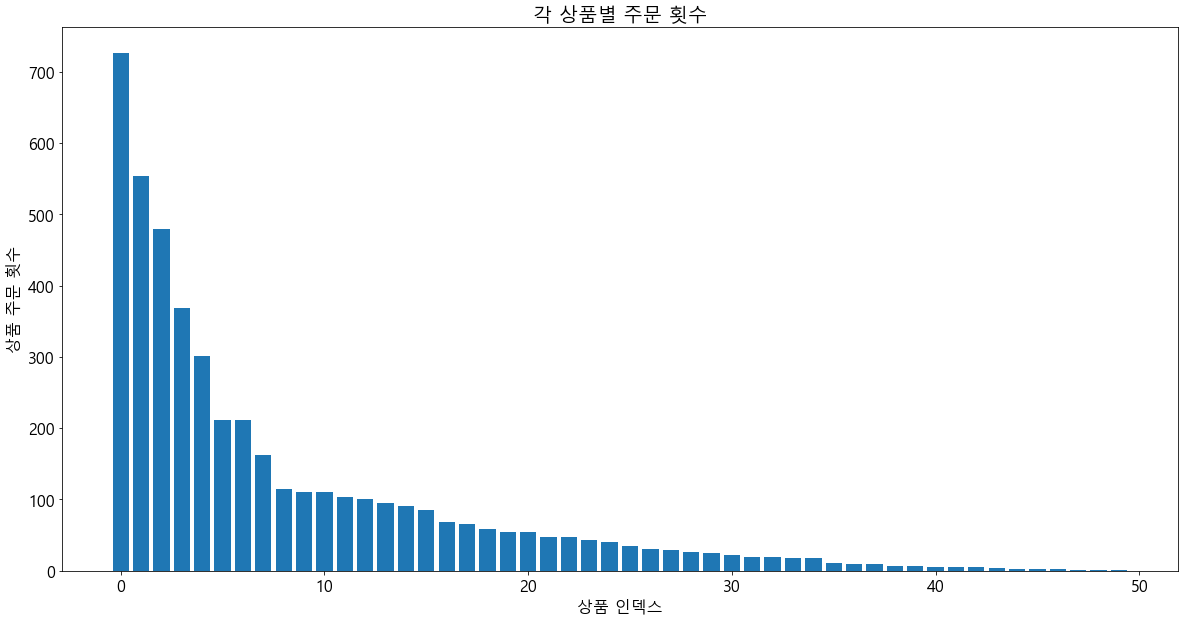

In [15]:
# 각 상품별 주문 횟수
order_count = order_count.sort_values(ascending=False)
item_name_list = order_count.index.tolist()
# x 축 (상품의 개수만큼 값이 들어있는 range)
x = np.arange(len(item_name_list))
# 상품별 주문 횟수
order_count2 = order_count.values.tolist()

# 시각화
plt.bar(x, order_count2, align='center')
plt.ylabel('상품 주문 횟수')
plt.xlabel('상품 인덱스')
plt.title('각 상품별 주문 횟수')
plt.show()


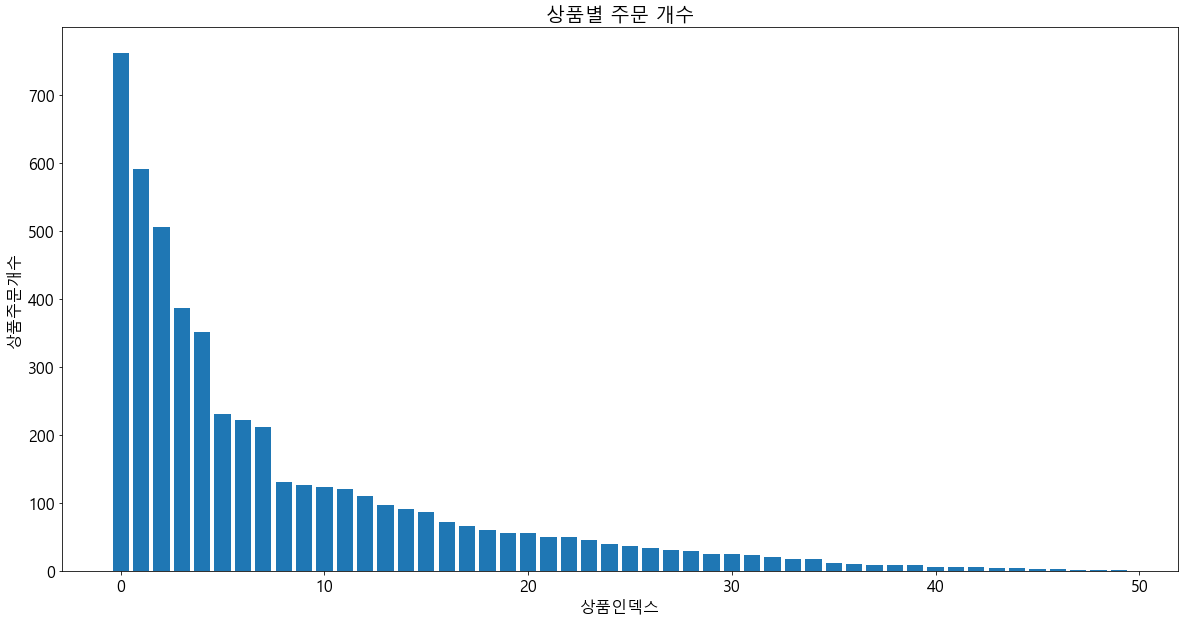

In [19]:
# 주문 상품 총 개수
# 값을 기준으로 내림차순 정렬을 한다.
item_quantity.sort_values(ascending=False, inplace=True)

# 상품 이름 목록
item_name_list = item_quantity.index.tolist()


# 시각화
# X축(상품의 개수만큼 값이 들어있는 range)
x_pos = np.arange(len(item_name_list))

# 상품별 주문 개수
item_cnt = item_quantity.values.tolist()

plt.bar(x_pos, item_cnt, align="center")
plt.ylabel("상품주문개수")
plt.xlabel("상품인덱스")
plt.title("상품별 주문 개수")
plt.show()

In [21]:
df1 = pd.DataFrame({
    '가장 많이 주문한 상품' : order_count.head(10).index,
    "주문횟수" : order_count.head(10).values,
    "주문개수 top10 상품명" : item_quantity.head(10).index,
    "주문개수" : item_quantity.head(10).values
})
df1

,가장 많이 주문한 상품,주문횟수,주문개수 top10 상품명,주문개수
0,Chicken Bowl,726,Chicken Bowl,761
1,Chicken Burrito,553,Chicken Burrito,591
2,Chips and Guacamole,479,Chips and Guacamole,506
3,Steak Burrito,368,Steak Burrito,386
4,Canned Soft Drink,301,Canned Soft Drink,351
5,Steak Bowl,211,Chips,230
6,Chips,211,Steak Bowl,221
7,Bottled Water,162,Bottled Water,211
8,Chicken Soft Tacos,115,Chips and Fresh Tomato Salsa,130
9,Chicken Salad Bowl,110,Canned Soda,126


- 주문 당 평균 계산 금액 출력
- 한 주문에 10달러 이상 사용한 주문의 id를 출력한다.
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇 개 팔렸는ㄴ지
- 'Veggie Salad Bowl"이 몇 번 주문 되었는지
- " Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기